## Approach to solve the problem:
Predicting a player’s rank using the information provided in the dataset:

1. Exploratory Data Analysis (EDA): <br>
Perform an initial exploration of the dataset to understand its structure, features, and relationships. This step helps in gaining insights and identifying any data quality issues or missing values. Some tasks to perform during EDA include: <br>
a. Identify missing values using the isnull() function. <br>
b. Generate descriptive statistics using the describe() function. <br>
c. Visualize the distribution of target variable and features using plots (histograms, box plots, etc.) from libraries like matplotlib and seaborn. <br>


2. Data Preprocessing: <br>
a. Handle missing values: Depending on the extent of missing data, you can choose to drop rows or columns with missing values or impute them using techniques like mean, median, or mode. <br>
b. Encode categorical variables: If there are categorical variables in the dataset, encode them using techniques like one-hot encoding or label encoding, depending on the nature of the variables. <br>
c. Split the data: Divide the dataset into training and testing sets. <br>


3. Feature Selection or Engineering: <br>
Based on the insights gained during EDA, you might need to perform feature selection or engineering to improve the model's performance. This can involve removing irrelevant or highly correlated features, creating new features, or transforming existing ones.


4. Model Training and Evaluation: <br>
a. Experiment with different machine learning algorithms for classification like logistic regression, decision trees, random forest, or support vector machines, since predicting rank is a classification problem. <br>
b. Train the model using the training data. <br>
c. Evaluate the model's performance using appropriate evaluation metrics such as accuracy, precision, recall, and F1 score. Use the testing data for evaluation. <br>


5. Model Improvement and Tuning:
If the model's performance is not satisfactory, you can try different algorithms or tune hyperparameters to improve it. This can be done using techniques like grid search or random search.


6. Model Deployment and Communication:
Once you have a satisfactory model, you can deploy it to make predictions on new data.
Document your findings, methodology, and evaluation results in a clear and concise manner, suitable for non-technical stakeholders.
Communicate the findings to stakeholders using visualizations and explanations that are easily understandable.


## Hypothetical: 
If stakeholders want to collect more data, you can advise them based on your EDA and model results:

1. Identify the areas where the dataset is lacking or where more data could be beneficial. For example, if certain features have a high correlation with the target variable but are limited in the current dataset, suggest collecting more data for those features.
2. Assess if there are any class imbalances or biases in the data and suggest collecting more data to address these issues.
3. Analyze if certain subsets of the data are underrepresented and recommend collecting more data to balance the representation.
4. Consider any specific insights or patterns observed during the model building process and suggest collecting more data to validate or refine those findings.
5. By providing guidance on data collection based on your EDA and model results, you can help stakeholders improve the model's accuracy and robustness.

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('data/starcraft_player_data.csv')
data.shape

(3395, 20)

## Exploratory Data Analysis

In [3]:
data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [4]:
data.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


## Impute missing values

In [5]:
# some of the columns have '?' instead of missing values
data.replace('?', np.nan, inplace=True)

In [6]:
# data types of the dataframe
data.dtypes

GameID                    int64
LeagueIndex               int64
Age                      object
HoursPerWeek             object
TotalHours               object
APM                     float64
SelectByHotkeys         float64
AssignToHotkeys         float64
UniqueHotkeys             int64
MinimapAttacks          float64
MinimapRightClicks      float64
NumberOfPACs            float64
GapBetweenPACs          float64
ActionLatency           float64
ActionsInPAC            float64
TotalMapExplored          int64
WorkersMade             float64
UniqueUnitsMade           int64
ComplexUnitsMade        float64
ComplexAbilitiesUsed    float64
dtype: object

In [7]:
# missing data
data.isna().sum()

GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

Missing values in age, hrs per week and total hours cols - need to imputate them!

In [8]:
data['Age'].astype(float).describe()

count    3340.000000
mean       21.647904
std         4.206341
min        16.000000
25%        19.000000
50%        21.000000
75%        24.000000
max        44.000000
Name: Age, dtype: float64

In [9]:
# imputing the age column using mean value since age is normally distributed
data['Age'].fillna(data['Age'].astype(float).mean(), inplace=True)
data['Age'] = data['Age'].astype(float)

In [10]:
data['HoursPerWeek'].astype(float).describe()

count    3339.000000
mean       15.910752
std        11.962912
min         0.000000
25%         8.000000
50%        12.000000
75%        20.000000
max       168.000000
Name: HoursPerWeek, dtype: float64

In [11]:
# imputing the hrs per week column using median since it has outliers, and median is less sensitive to outliers
data['HoursPerWeek'].fillna(data['HoursPerWeek'].median(), inplace=True)
data['HoursPerWeek'] = data['HoursPerWeek'].astype(int)

In [12]:
data['TotalHours'].astype(float).describe()

count       3338.000000
mean         960.421809
std        17318.133922
min            3.000000
25%          300.000000
50%          500.000000
75%          800.000000
max      1000000.000000
Name: TotalHours, dtype: float64

In [13]:
# imputing the total hrs column using median since it has some massive outliers
data['TotalHours'].fillna(data['TotalHours'].median(), inplace=True)
data['TotalHours'] = data['TotalHours'].astype(int)

In [14]:
# Identifying the unique number of values in the dataset
data.nunique()

GameID                  3395
LeagueIndex                8
Age                       29
HoursPerWeek              32
TotalHours               237
APM                     3374
SelectByHotkeys         3375
AssignToHotkeys         3361
UniqueHotkeys             11
MinimapAttacks          2471
MinimapRightClicks      3302
NumberOfPACs            3386
GapBetweenPACs          3358
ActionLatency           3367
ActionsInPAC            3223
TotalMapExplored          52
WorkersMade             3256
UniqueUnitsMade           12
ComplexUnitsMade        1110
ComplexAbilitiesUsed    1828
dtype: int64

In [15]:
# GameID is just an index column, so dropping it
data.drop(['GameID'], axis=1, inplace=True)

## Data Visualizations

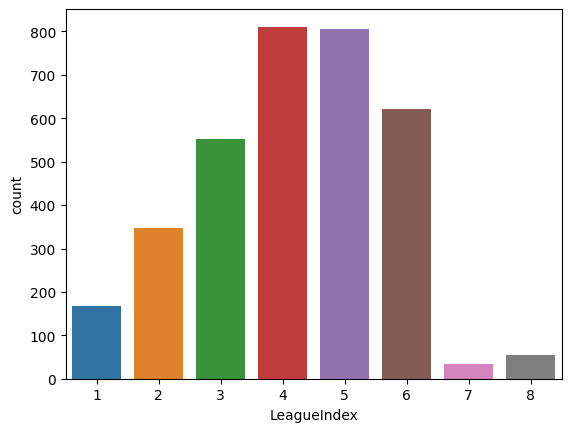

In [16]:
# distribution of the target variable to check if it is skewed or balanced
sns.countplot(x='LeagueIndex', data=data)
plt.show()

Target variable is almost normally distributed!

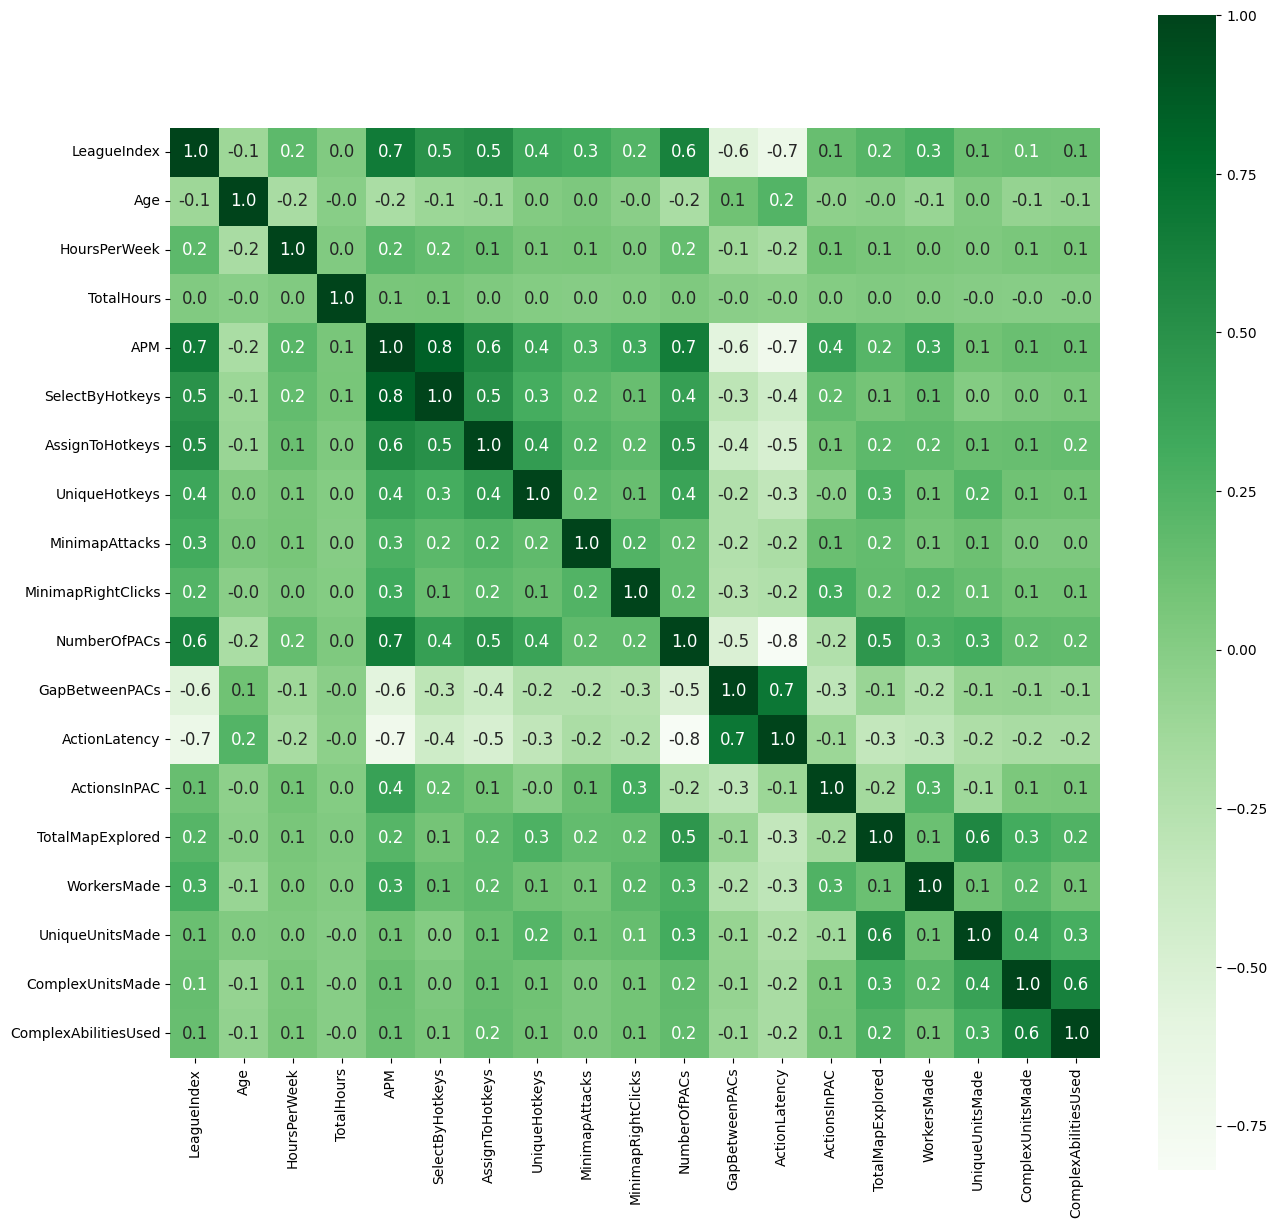

In [17]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Greens')
plt.show()

The heatmap of the correlation plot provides a visual representation of the correlation between pairs of variables in a dataset, and allows us to identify relationships, dependencies, and patterns among the variables.

1. Correlation Strength: The heatmap color-codes the correlation coefficients, making it easy to identify the strength and direction of the relationships. High positive correlations are represented by brighter colors (e.g., dark green), indicating that the variables move together. Negative correlations are represented by darker colors (e.g., white), suggesting an inverse relationship.

2. Feature Selection: The heatmap helps in feature selection by identifying highly correlated variables. If two variables are strongly correlated (either positively or negatively), it indicates that they carry similar information. In such cases, you may choose to remove one of the variables to avoid multicollinearity and reduce redundancy in your analysis.

3. Multivariate Analysis: The heatmap allows for multivariate analysis by showing the correlation between all pairs of variables simultaneously. This helps in identifying clusters or groups of variables that are highly correlated with each other. Such groups can provide insights into underlying patterns or relationships within the data.

4. Missing Data and Imputation: The heatmap can reveal missing data patterns and help in deciding on an appropriate strategy for imputing missing values. If there are correlations between missing values in different variables, it may indicate a systematic pattern or relationship. This understanding can guide the imputation process or suggest the need for additional data collection.

5. Model Building: The heatmap can assist in model building by identifying variables that are strongly correlated with the target variable. Variables with high correlation can be considered as potential predictors in the model. Additionally, the heatmap can reveal any correlations between predictors, helping in understanding the potential impact of multicollinearity on the model's performance.

C:\Users\shrea\anaconda3\envs\ppi_pred\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


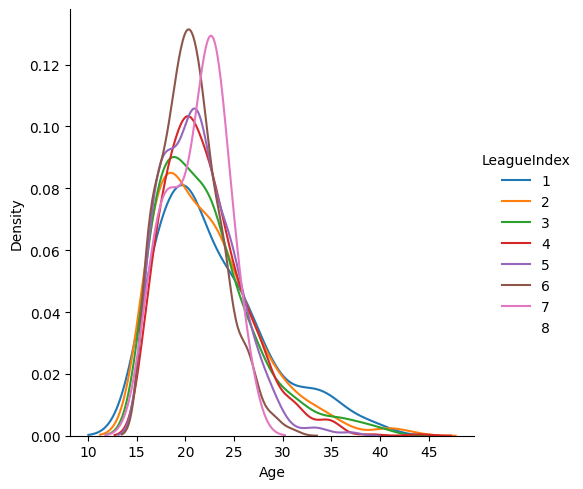

In [18]:
# Distribution density plot KDE (kernel density estimate) for age
sns.FacetGrid(data, hue="LeagueIndex", height=5).map(sns.kdeplot, "Age").add_legend()
plt.show()

Younger players between 15-27 are more likely to have a higer rank. After 30 years, the skill level starts decreasing.

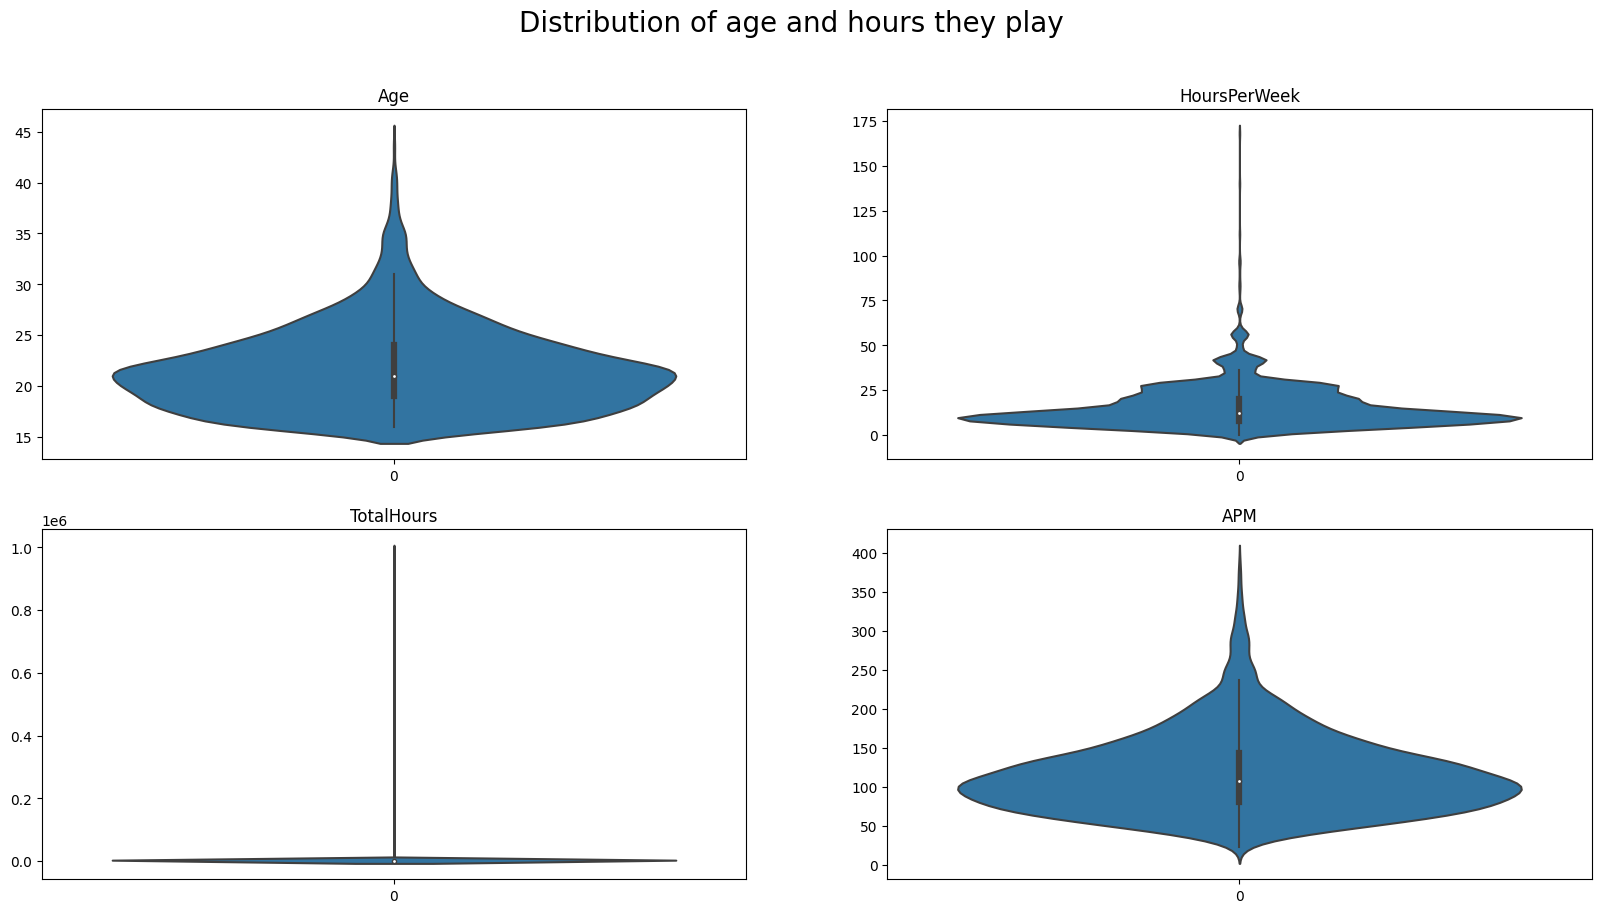

In [19]:
# distribution of age and hours they play
fig,ax = plt.subplots(2,2, figsize=(20,10))
plt.suptitle("Distribution of age and hours they play", fontsize=20)
sns.violinplot(data['Age'], ax = ax[0][0])
ax[0][0].set_title('Age')
sns.violinplot(data['HoursPerWeek'], ax = ax[0][1])
ax[0][1].set_title('HoursPerWeek')
sns.violinplot(data['TotalHours'], ax = ax[1][0])
ax[1][0].set_title('TotalHours')
sns.violinplot(data['APM'], ax = ax[1][1])
ax[1][1].set_title('APM')
plt.show()

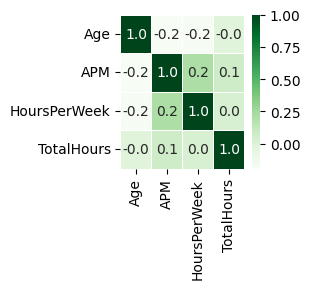

In [20]:
# Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(2,2))
sns.heatmap(data[['Age','APM','HoursPerWeek','TotalHours']].corr(), annot=True, cmap='Greens', linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

## Model Training

In [21]:
data.head(1)

,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,5,27.0,10,3000,143.718,0.003515,0.00022,7,0.00011,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.0


In [22]:
# Spliting target variable and independent variables
X = data.drop(['LeagueIndex'], axis=1)
y = data['LeagueIndex']

In [23]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0, stratify=y)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\shrea\anaconda3\envs\ppi_pred\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [25]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted).T
    sns.heatmap(cm, annot=True )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

Logistic Regression Accuracy :  38.16


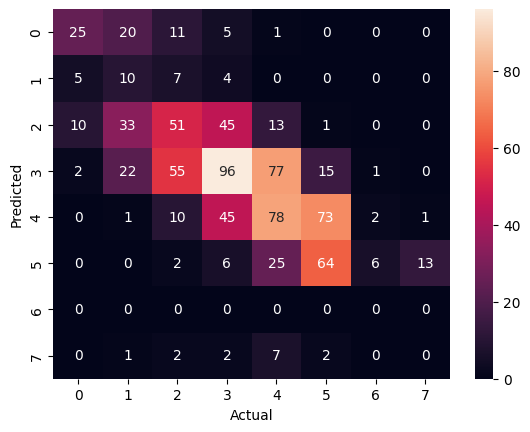

In [26]:
# Prediction on test data
y_pred = logreg.predict(X_test)
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Logistic Regression Accuracy : ', acc_logreg )
draw_cm(y_test, y_pred)

### Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

Naive Bayes Accuracy :  38.75


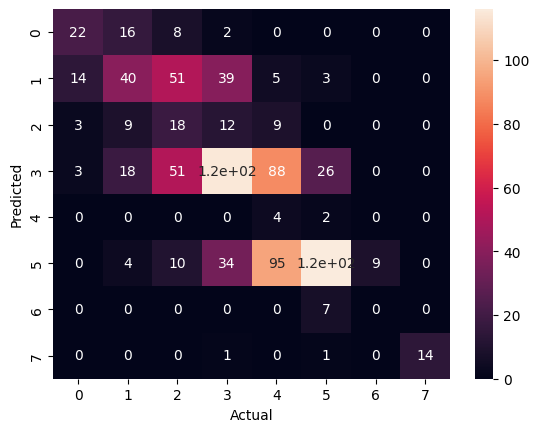

In [28]:
y_pred = model.predict(X_test)
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Naive Bayes Accuracy : ', acc_nb )
draw_cm(y_test, y_pred)

### Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
# y_pred = clf.predict(X_train)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


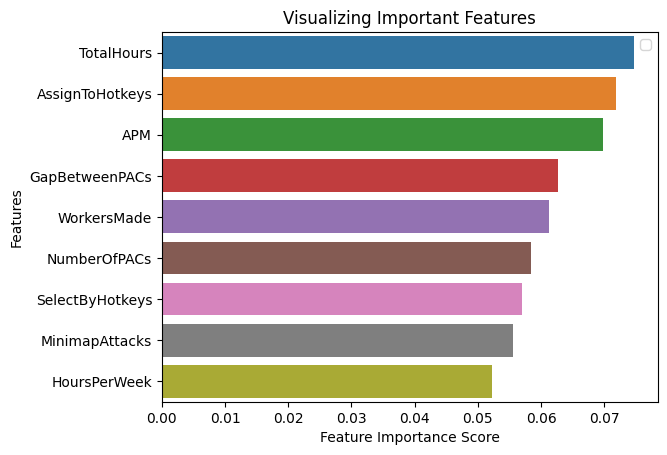

In [31]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]
sns.barplot(x=feature_importance[1], y=feature_importance[0])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Decision Tree Accuracy :  35.34


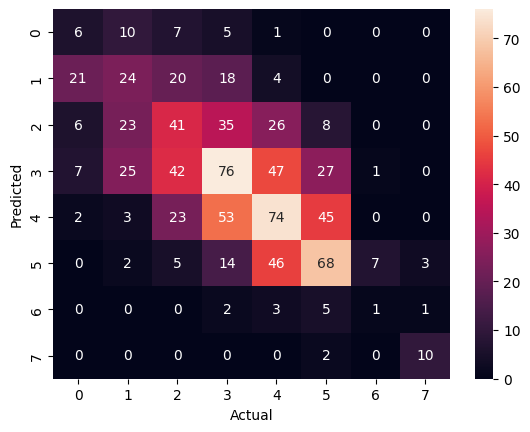

In [32]:
y_pred = clf.predict(X_test)
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Decision Tree Accuracy : ', acc_dt )
draw_cm(y_test, y_pred)

### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


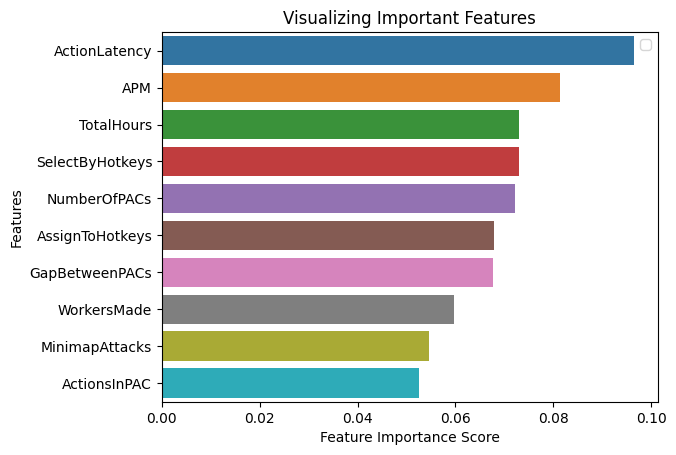

In [34]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

Random Forest Accuracy :  42.99


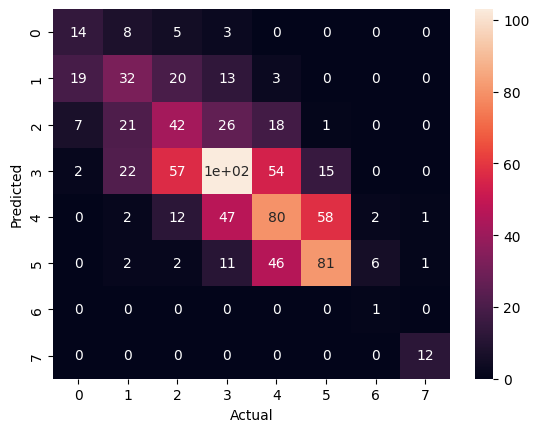

In [35]:
y_pred = rf.predict(X_test)
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Random Forest Accuracy : ', acc_rf )
draw_cm(y_test, y_pred)

### SVM

In [38]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
svc = svm.SVC()
svc.fit(X_train_scaled,y_train)

SVC()

SVM Accuracy :  39.93


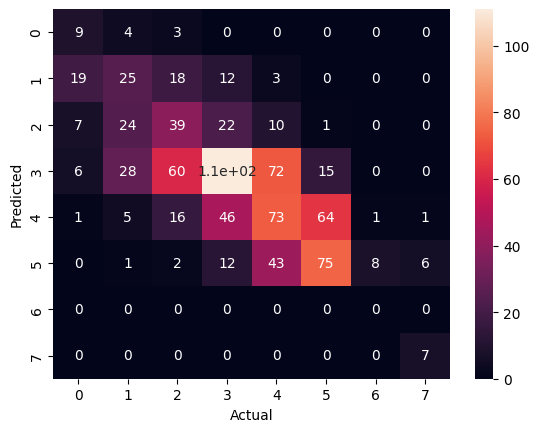

In [39]:
y_pred = svc.predict(X_test_scaled)
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'SVM Accuracy : ', acc_svm )
draw_cm(y_test, y_pred)

### K - Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

KNN Accuracy :  33.33


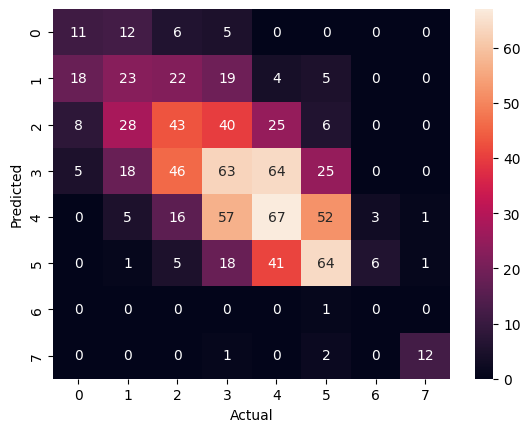

In [41]:
y_pred = knn.predict(X_test)
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'KNN Accuracy : ', acc_knn )
draw_cm(y_test, y_pred)

### XGBoost

In [44]:
from xgboost import XGBClassifier, plot_importance
gbm = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=5)
gbm.fit(X_train, y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7], got [1 2 3 4 5 6 7 8]

In [ ]:
y_pred = gbm.predict(X_test)
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )
draw_cm(y_test, y_pred)

In [ ]:
# Feature Engineering
fig, ax = plt.subplots(figsize=(12,15))
plot_importance(gbm, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [ ]:
gbm.get_booster().get_score(importance_type="gain")

### Neural Net

In [ ]:
# Converting arrays to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Creating the architecture of the ANN
class NeuralNet(nn.Module):
    def __init__(self, input_features=4, hidden1=4, hidden2=4, out_features=3):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x
# Instantiate the model
torch.manual_seed(1)
model = NeuralNet()
model.parameters

In [ ]:
# Backpropagation - Loss function, optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
epochs = 500
final_losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if(i%10==0):
        print("In Epoch {}, the loss is: {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# Loss function
plt.plot(range(epochs), final_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
# Predicting on test data
predictions = []
with torch.no_grad():
    for i, (test_data, actual) in enumerate(zip(X_test, y_test)):
        y_pred = model(test_data)
        predict = y_pred.argmax().item()
        predictions.append(predict)
        print("Predicted: ", predict, "; Actual: ", actual.item())

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test.tolist(), predictions)
print(score)
draw_cm(y_test.tolist(), predictions)

## Evaluation and comparision of all the models

In [42]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,42.99
4,Support Vector Machines,39.93
1,Naive Bayes,38.75
0,Logistic Regression,38.16
2,Decision Tree,35.34
5,K - Nearest Neighbors,33.33
